In [1]:
import numpy as np
import sunpy.map
import matplotlib.pyplot as plt

In [4]:
map = sunpy.map.Map('/Users/masonjp2/Dropbox/suncet_dropbox/9000 Processing/data/synthetic/level0_raw/fits/config_default_OBS_2023-02-14T17:00:00.000_333.fits')
data = map.data

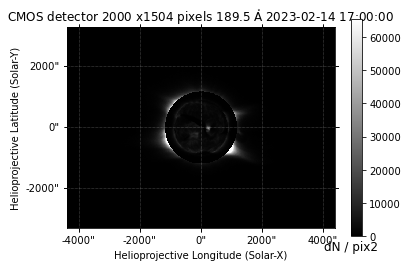

In [5]:
map.peek()

In [6]:
def apply_radial_filter(data, sigma):
    # Determine the center of the image
    xc, yc = data.shape[1] / 2, data.shape[0] / 2

    # Create a radial distance array
    Y, X = np.ogrid[:data.shape[0], :data.shape[1]]
    r = np.sqrt((X - xc)**2 + (Y - yc)**2)

    # Define a radial filter function, e.g., a Gaussian
    # Adjust sigma to control the spread of the Gaussian
    radial_filter = np.exp(-(r**2 / (2. * sigma**2)))

    # Apply the filter
    filtered_data = data * radial_filter

    return filtered_data

In [7]:
def jpm_plot(data, filtered_data, scale=None):
    plt.figure(figsize=(24, 12))
    
    scale_funcs = {
        'log': lambda x: np.log10(np.clip(x, 0.1, None)),
        'sqrt': np.sqrt,
        '1/3': lambda x: x**(1/3),
        '1/4': lambda x: x**(1/4),
        '1/8': lambda x: np.clip(x**(1/8), 0.5, None),
        '1/10': lambda x: x**(1/10),
    }
    scale_func = scale_funcs.get(scale, lambda x: x)  # Default to no scaling if not found

    plt.subplot(1, 2, 1)
    plt.imshow(scale_func(data), cmap='inferno')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(scale_func(filtered_data), cmap='inferno')
    plt.title('Filtered Image')

    plt.show()

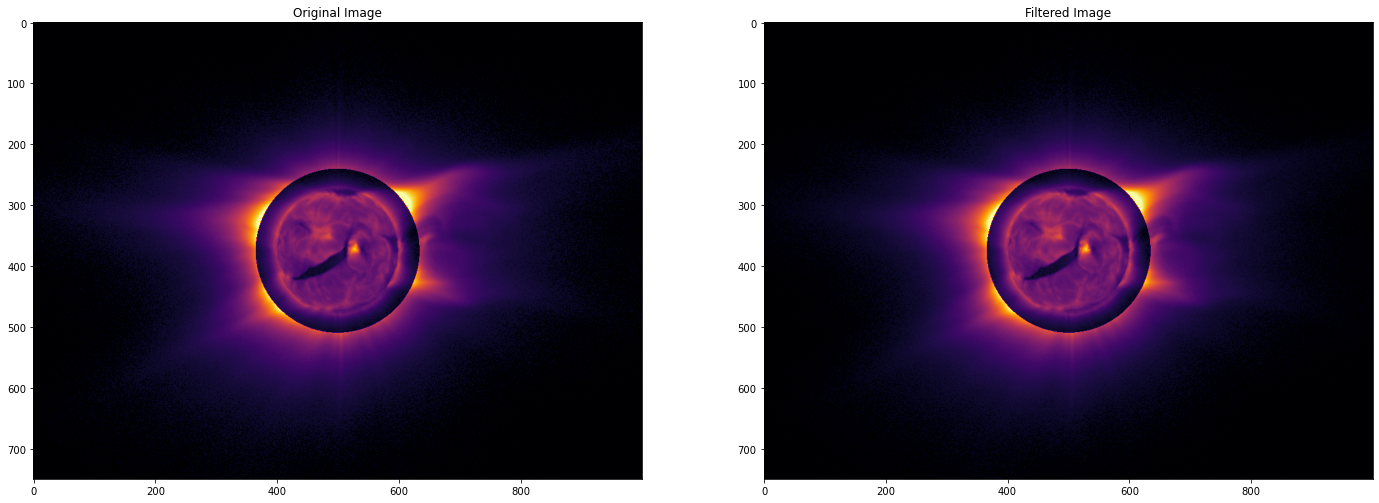

In [16]:
filtered_data = apply_radial_filter(data, 300)
jpm_plot(data, filtered_data, scale='1/3')

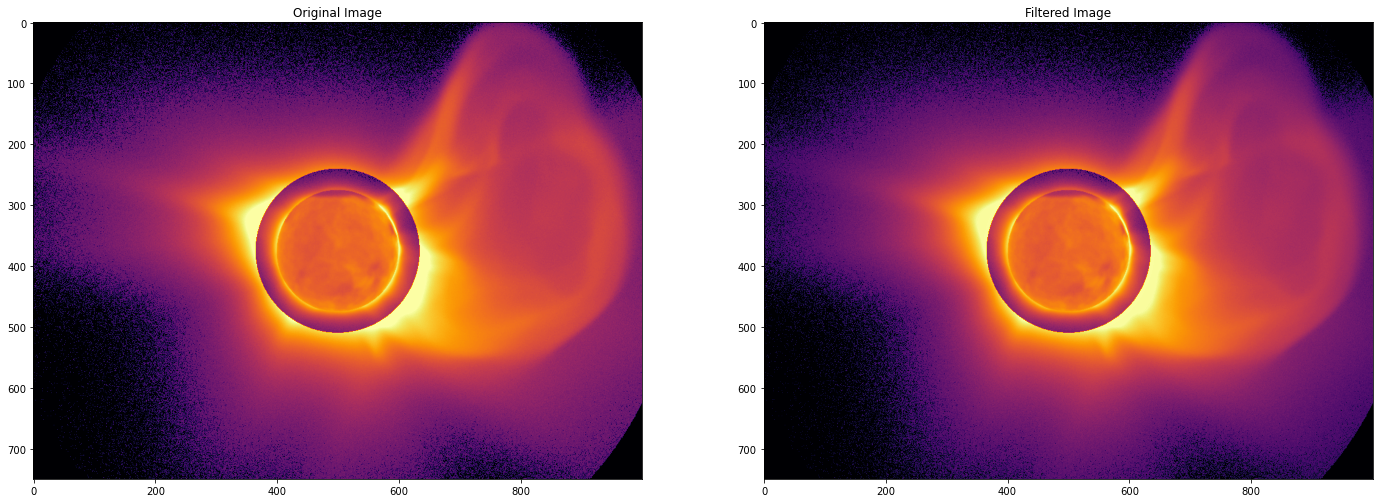

In [16]:
filtered_data = apply_radial_filter(data, 300)
jpm_plot(data, filtered_data, scale='1/8')

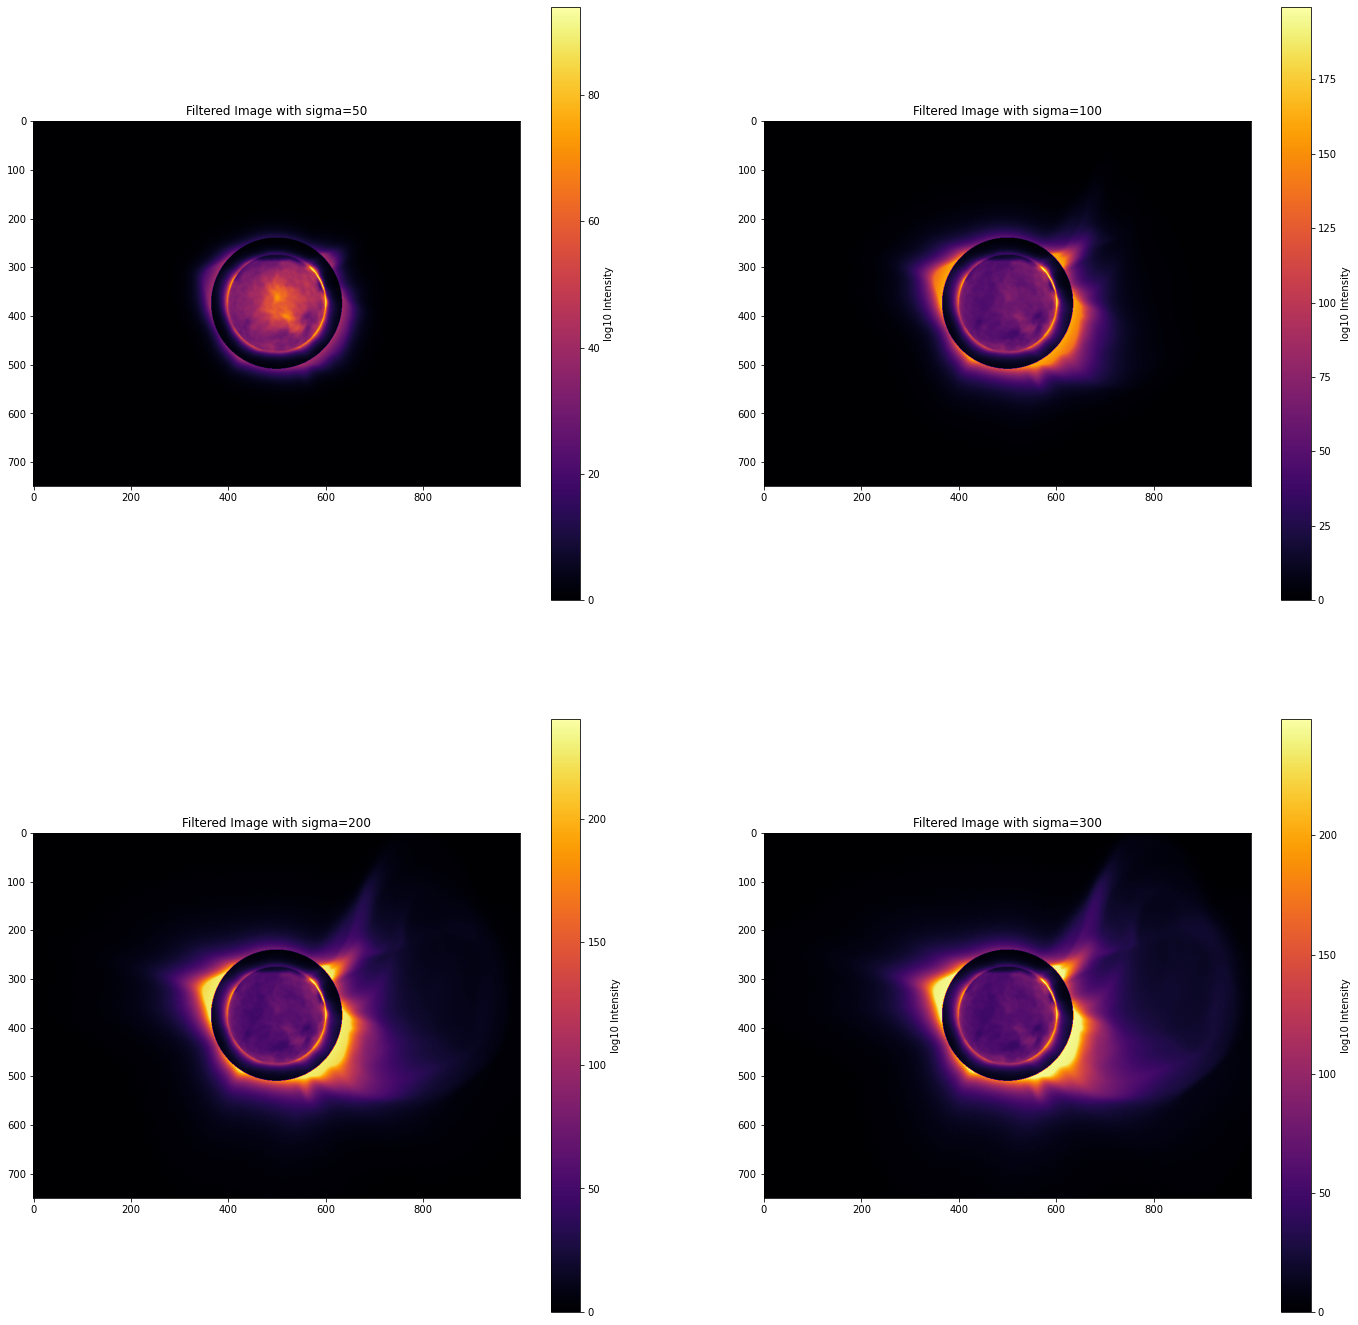

In [11]:
sigma_values = [50, 100, 200, 300]  # Example sigma values, adjust as needed
filtered_images = [apply_radial_filter(data, sigma) for sigma in sigma_values]

# Plot the results
plt.figure(figsize=(24, 24))
for i, filtered_data in enumerate(filtered_images, 1):
    plt.subplot(2, 2, i)
    plt.imshow(np.sqrt(filtered_data), cmap='inferno')
    plt.title(f'Filtered Image with sigma={sigma_values[i-1]}')
    plt.colorbar(label='log10 Intensity')
plt.show()

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import os
from glob import glob
import imageio

def apply_radial_filter(data, sigma):
    # Determine the center of the image
    xc, yc = data.shape[1] / 2, data.shape[0] / 2

    # Create a radial distance array
    Y, X = np.ogrid[:data.shape[0], :data.shape[1]]
    r = np.sqrt((X - xc)**2 + (Y - yc)**2)

    # Define a radial filter function, e.g., a Gaussian
    # Adjust sigma to control the spread of the Gaussian
    radial_filter = np.exp(-(r**2 / (2. * sigma**2)))

    # Apply the filter
    filtered_data = data * radial_filter

    return filtered_data


def plot_scaled_image(data, title, output_filename, scale=None):
    plt.figure(figsize=(24, 24))
    scale_funcs = {
        'log': lambda x: np.log10(np.clip(x, 0.1, None)),
        'sqrt': np.sqrt,
        '1/4': lambda x: x**(1/4),
        '1/8': lambda x: np.clip(x**(1/8), 0.5, None),
    }
    scale_func = scale_funcs.get(scale, lambda x: x)  # Default to no scaling if not found
    
    plt.imshow(scale_func(data), cmap='inferno')
    plt.axis('off')
    plt.savefig(output_filename, bbox_inches='tight', pad_inches=0)
    plt.close()

path = os.getenv('suncet_data') + '/synthetic/level0_raw/fits/'
filenames = 'config_default_OBS_2023-02-14T17:00:00.000_*.fits'
fits_files = sorted(glob(path + filenames))
image_files = []

for file in fits_files:
    with fits.open(file) as hdul:
        data = hdul[0].data
        filtered_data = apply_radial_filter(data, 300)

    output_filename = f"{file.split('.')[1]}.png"
    plot_scaled_image(filtered_data, '', output_filename, scale='1/4')
    image_files.append(output_filename)

with imageio.get_writer('movie.mp4', fps=10) as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)


/var/folders/vm/nfh3cfj106121z2ph22yffx40000gq/T/ipykernel_13039/1271875650.py:57: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1339, 1004) to (1344, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x7fb248048000] Warning: data is not aligned! This can lead to a speed loss
